DMBI PROJECT - **RAIN** **IN** **AUSTRALIA** **PREDICTION** **USING** **LRC**, **NBC** **AND** **RFC** 

TEAM MEMBERS - 

**JINAL** **VYAS** (**191310132019**)

**KRUPA** **BHAVSAR** (**191310132029**)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**LOADING DATA**

In [6]:
data = 'weatherAUS.csv'

df = pd.read_csv(data)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Exploratory data analysis**

In [7]:
# checking shape of data
df.shape

(145460, 23)

In [8]:
# checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
# checking target column values counts
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0.5, 1.0, 'Target Count')

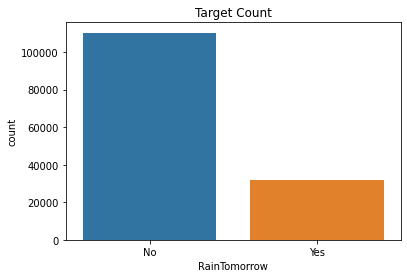

In [10]:
# Plotting count of target column
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('RainTomorrow',data=df)
plt.title("Target Count")

In [11]:
# checking null values
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

As we can see from the above output that data has lot of NAN values and we need to treat them for our model.First we will divide the data in category and integer datatypes

In [12]:
# dropping NA values from target column
print(df.shape)
df.dropna(subset=['RainTomorrow'],inplace = True)
df = df.reset_index(drop=True)
print(df.shape)

(145460, 23)
(142193, 23)


In [13]:
categorical = [ i for i in df.columns if df[i].dtype =='O']
integer = [i for i in df.columns if df[i].dtype !='O']
print('Categorical data types columns:',categorical)
print('Integer data types columns:',integer)


Categorical data types columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Integer data types columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
# checking NAN values in data type integer
df[integer].isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [15]:
# checking NAN values in data type categorical
df[categorical].isna().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [16]:
# Convertig Date column in to date format and splitting it into year,month and date
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop('Date',axis = 1,inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [17]:
df[['year', 'month','day']] = df[['year', 'month','day']].astype('string')
print(df.year.dtypes)

string


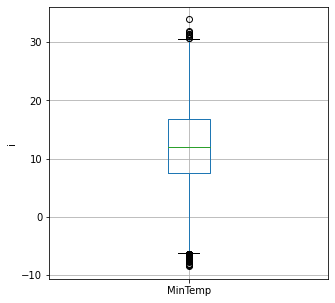

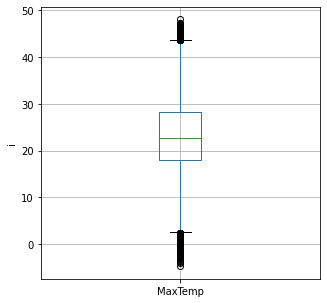

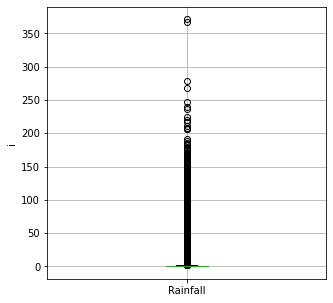

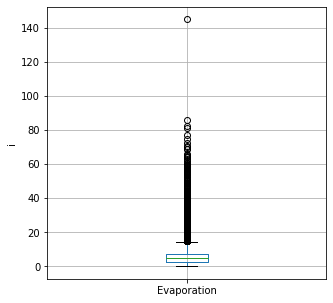

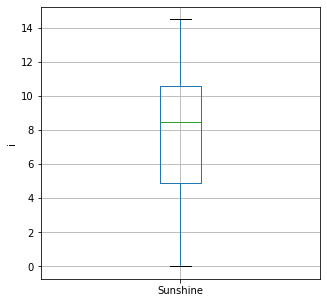

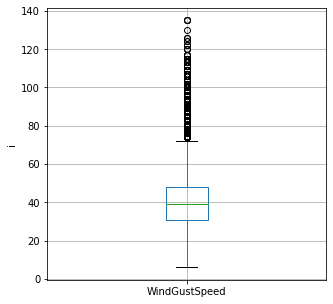

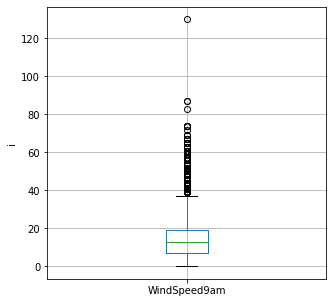

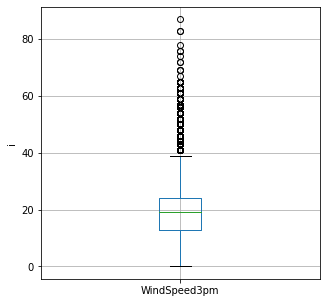

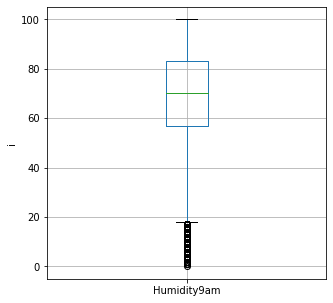

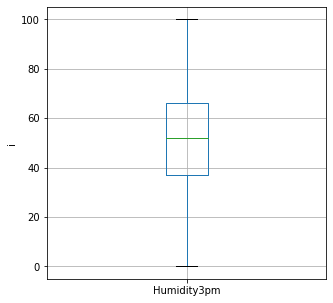

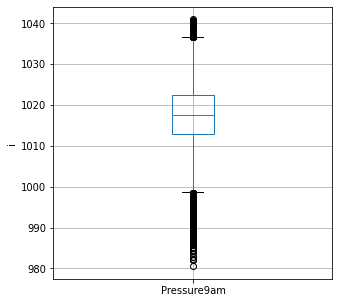

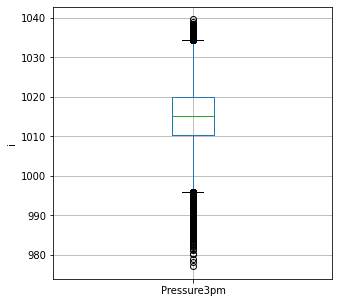

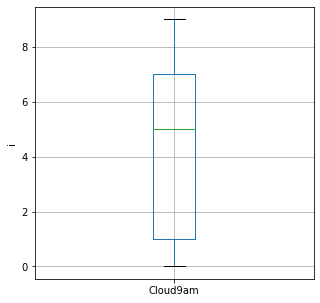

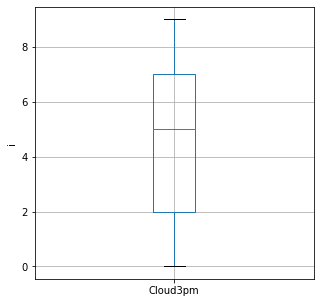

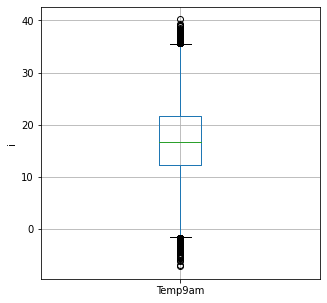

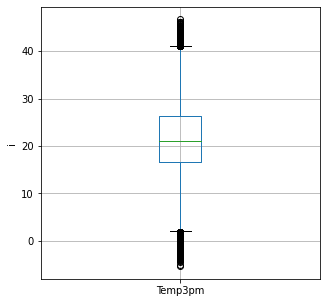

In [18]:
# checking for outliers in numerical data type columns
# first we will analyze outliers using box plot
for i in integer:
    plt.figure(figsize=(5,5))
    fig = df.boxplot(column=i)
    fig.set_ylabel('i')



In [19]:
# now we will use IQR method to remove outliers from the required columns
from scipy import stats
q1 = df.MinTemp.quantile(0.25)
q3 = df.MinTemp.quantile(0.75)
iqr = q3-q1
lowerbound = q1 - 1.5 * iqr
upperbound = q3 + 1.5 * iqr
df.drop(df[ (df.MinTemp > upperbound) | (df.MinTemp < lowerbound) ].index , inplace=True)

Text(0, 0.5, 'MinTemp')

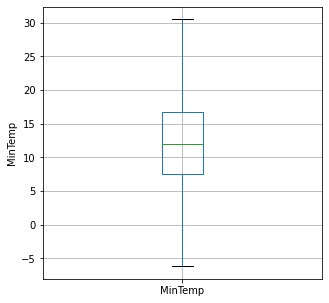

In [20]:
# checking boxplot for MinTemp
plt.figure(figsize=(5,5))
fig = df.boxplot(column='MinTemp')
fig.set_ylabel('MinTemp')

As we can see that now outliers are removed from this MinTemp, similary like this we will remove the outliers from all the other columns.

In [21]:
# removing outliers from the remaining columns
l1 = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for i in l1:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5 * iqr
    df.drop(df[ (df[i] > upperbound) | (df[i] < lowerbound) ].index , inplace=True)

In [22]:
# converting them again in integer
df[['year', 'month','day']] = df[['year', 'month','day']].astype('int')
print(df.year.dtypes)


int64


In [23]:
# new columns with data type integer
integer1 = [i for i in df.columns if df[i].dtype !='O']
print(integer1)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


**Splitting the Data**

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((85016, 24), (21255, 24))

Checking NAN values in the integer data types and replacing them with the Median values of the column

In [25]:
# replacing integer NAN values with Median 
for df in [X_train, X_test]:
    for col in integer1:
        col_median=X_train[col].median()
        df[col].fillna(col_median, inplace=True)

In [26]:
# checking values in X_train
X_train[integer1].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

In [27]:
# checking values in X_test
X_test[integer1].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

In [28]:
# replcaing NAN values with the mode in categorical data types
for df1 in [X_train, X_test]:
    df1['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df1['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df1['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df1['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [29]:
categorical1 = [i for i in X_train.columns if X_train[i].dtype == 'O']
# As Location column don't have any NAN values
categorical1.remove('Location')
# checking NAN values in X_train
X_train[categorical1].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [30]:
# checking NAN values in X_test
X_test[categorical1].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [31]:
# Encoding Rain Today column
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
X_train['RainToday'] = label_encoder.fit_transform(X_train['RainToday'])

X_test['RainToday'] = label_encoder.transform(X_test['RainToday'])
 
print(X_train['RainToday'].unique())
print(X_train.columns)

[1 0]
Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month', 'day'],
      dtype='object')


In [32]:
# Encode categorical variables
X_train = pd.concat([X_train[integer1], X_train['RainToday'],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22781,21.1,25.0,1.2,5.2,4.8,33.0,17.0,22.0,89.0,84.0,...,0,0,1,0,0,0,0,0,0,0
20511,17.3,25.4,0.2,5.0,9.2,22.0,7.0,19.0,74.0,58.0,...,0,0,0,0,1,0,0,0,0,0
139813,19.2,36.0,0.0,8.0,9.2,33.0,6.0,19.0,50.0,23.0,...,0,0,0,0,0,1,0,0,0,0
17454,13.8,27.5,0.0,5.0,9.2,37.0,0.0,17.0,72.0,49.0,...,0,0,0,1,0,0,0,0,0,0
46383,-0.5,21.8,0.0,5.0,9.2,22.0,6.0,11.0,72.0,33.0,...,1,0,0,0,0,0,0,0,0,0


In [33]:
# Encode categorical variables
X_test = pd.concat([X_test[integer1], X_test['RainToday'],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
62691,2.6,17.8,0.0,5.0,9.2,37.0,6.0,9.0,99.0,54.0,...,0,0,0,0,0,0,0,0,0,0
87872,20.1,30.3,0.0,5.0,9.2,24.0,11.0,19.0,65.0,72.0,...,0,0,0,0,0,0,0,0,0,0
96717,11.1,25.1,0.0,5.0,9.2,26.0,11.0,7.0,66.0,27.0,...,0,0,0,0,0,0,0,0,1,0
40766,13.4,20.0,0.0,5.0,9.2,31.0,13.0,15.0,90.0,67.0,...,0,0,0,0,0,0,0,0,0,0
37794,2.1,14.1,0.0,1.4,5.9,28.0,11.0,11.0,81.0,57.0,...,0,0,0,0,0,0,0,0,0,1


**Data Normalization**

In [34]:
# data Normalization
cols = X_train.columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

**Model Training**

In [35]:
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    
    # Return the performance metric
    return score

Checking Logistic Regression Algorithm

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0)
log_score = fit_and_evaluate(logreg)
print('Logistic Regression Performance on the test set: score = %0.4f' % log_score)

Logistic Regression Performance on the test set: score = 0.8711


Checking Naive Bayes Algorithm

In [37]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_score = fit_and_evaluate(naive)
print('Naive Bayes Performance on the test set: score = %0.4f' % naive_score)

Naive Bayes Performance on the test set: score = 0.6317


Checking Random Forest Algorithm

In [38]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_score = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Score = %0.4f' % random_score)

Random Forest Performance on the test set: Score = 0.8673


Since Logistic Regression gives the best accuracy score so we will calculate confusion matrix, sensitivity,specificity and auc_score on the Logistic Regression

In [55]:
# calculating confusion matrix
from sklearn.metrics import confusion_matrix
y_head_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_head_logreg)
print(cm_logreg)

[[17466   531]
 [ 2209  1049]]


In [40]:
# calculating sensitivity and specificity
sensitivity = (cm_logreg[0,0]/(cm_logreg[0,0] + cm_logreg[1,0]))
print("sensitivity:",sensitivity)
specificity = (cm_logreg[1,1]/(cm_logreg[1,1]+cm_logreg[0,1]))
print("specificity:",specificity)

sensitivity: 0.8877255400254129
specificity: 0.6639240506329114


In [41]:
TP = cm_logreg[0,0]
TN = cm_logreg[1,1]
FP = cm_logreg[0,1]
FN = cm_logreg[1,0]

In [42]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9705


In [43]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1289


In [44]:
from sklearn.metrics import roc_curve
y_pred1 = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print(ROC_AUC)

0.8389364430256143


Permutation importance is the first tool for understanding a machine-learning model, and it involves shuffling individual variables in the validation data (after a model has been fit) and seeing the effect on accuracy.

In [49]:
pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [50]:
# weightage to the column in Logistic Regression Algorithm
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance
l2=[]
l1 = X_train.columns.tolist()
for i in range(len(l1)):
    l2.append(l1[i][0])
    
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = l2)

Weight,Feature
0.0642 ± 0.0040,Pressure3pm
0.0395 ± 0.0036,Humidity3pm
0.0307 ± 0.0055,Pressure9am
0.0116 ± 0.0018,WindGustSpeed
0.0023 ± 0.0018,WindSpeed3pm
0.0016 ± 0.0014,Sunshine
0.0016 ± 0.0010,MaxTemp
0.0012 ± 0.0004,Wollongong
0.0010 ± 0.0014,Cloud3pm
0.0009 ± 0.0003,month
